In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [2]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', None)

In [3]:
df  = pd.read_csv("/data/project/thymelab/agonist_gln_results_pulldown/gln_placements_systems_whole_list.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/data/project/thymelab/agonist_gln_results_pulldown/gln_placements_systems_whole_list.csv'

In [ ]:
#this crashes with how big the dataframe is with the open options
#df
len(df)

In [4]:
#get rid of weird 0 ddg values
df = df[df['ddg'] != 0]

NameError: name 'df' is not defined

In [8]:
# Extract ligand names using a regular expression
df['ligand'] = df['file'].str.extract(r'7l1u_receptor_only_(.+?)_\d+_\d+\.pdb')

# Find the unique ligand names and their count
unique_ligands_general = df['ligand'].unique()
num_unique_ligands_general = len(unique_ligands_general)

# Display the unique ligand names and the count
#print("Unique Ligand Names:", unique_ligands_general)
print("Number of Unique Ligands:", num_unique_ligands_general)


Number of Unique Ligands: 231512


In [9]:

#matches = df[df['file'].str.contains('Z898771778', na=False)]  # na=False handles NaN values
#print(matches)

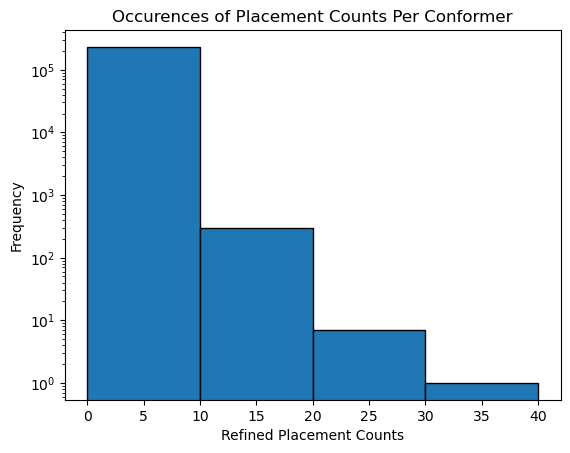

In [10]:
#derive counts of how many times the initial ligands appear to determine how many placements they get
#df_general['file_initial'].value_counts()
counts = df['ligand'].value_counts()

bin_edges = np.arange(0, max(counts), 10)

plt.yscale('log')

#plt.ylim(0,10000)

#create histogram
plt.hist(counts, bins=bin_edges, align = 'mid', edgecolor='black')

# Label axes and add a title
plt.xlabel('Refined Placement Counts')
plt.ylabel('Frequency')
plt.title('Occurences of Placement Counts Per Conformer')

# Show the plot
plt.show()

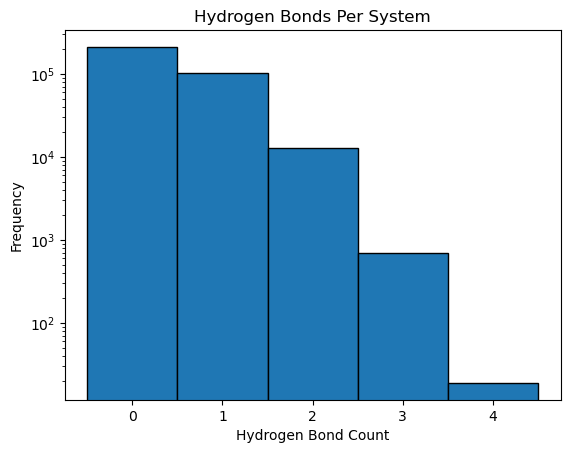

In [11]:
#hbond
x = df['hbond_motif_count']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System')

bin_edges = np.arange(-0.5, 5, 1)

# Plot histogram
#plt.hist(x, bins=bin_edges, edgecolor='black')

#create 30 bin 1D hsitogram
plt.hist(x, bins=bin_edges,  align='mid', width = 1, edgecolor='black')
#set grid
#plt.grid(True)

# Set y-axis to display in scientific notation with individual tick values
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))
# Set y-axis to display numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
#set y scale to log
plt.yscale('log')

#show plot
plt.show()

In [12]:
#make dataframe with only rosetta hbond count of 4
df_4_hbonds = df[df['hbond_motif_count'] >= 4]
df_4_hbonds = df_4_hbonds.sort_values(by='ddg')

In [13]:
df_4_hbonds

file        ddg  \
96901   /data/project/thymelab/agonist_gln_results_pul... -15.004311   
60023   /data/project/thymelab/agonist_gln_results_pul... -14.899842   
38693   /data/project/thymelab/agonist_gln_results_pul... -14.832012   
257089  /data/project/thymelab/agonist_gln_results_pul... -14.591815   
183967  /data/project/thymelab/agonist_gln_results_pul... -13.022943   
207946  /data/project/thymelab/agonist_gln_results_pul... -12.953311   
302565  /data/project/thymelab/agonist_gln_results_pul... -12.708892   
95580   /data/project/thymelab/agonist_gln_results_pul... -12.618504   
207948  /data/project/thymelab/agonist_gln_results_pul... -12.498574   
302579  /data/project/thymelab/agonist_gln_results_pul... -12.184935   
302562  /data/project/thymelab/agonist_gln_results_pul... -12.173296   
224537  /data/project/thymelab/agonist_gln_results_pul... -11.239358   
302573  /data/project/thymelab/agonist_gln_results_pul... -11.216669   
117018  /data/project/thymelab/agonist_gln_results_pul... -10.340824   
304159  /data/project/thymelab/agonist_gln_results_pul...  -9.788807   
224646  /data/project/thymelab/agonist_gln_results_pul...  -9.571888   
174349  /data/project/thymelab/agonist_gln_results_pul...  -9.549397   
253425  /data/project/thymelab/agonist_gln_results_pul...  -9.531743   
94782   /data/project/thymelab/agonist_gln_results_pul...  -9.485589   

        total_motifs  significant_motifs  real_motif_ratio  hbond_motif_count  \
96901           10.0                 2.0          0.100000                  4   
60023           11.0                 2.0          0.181818                  4   
38693           10.0                 2.0          0.100000                  4   
257089           8.0                 2.0          0.125000                  4   
183967           9.0                 2.0          0.111111                  4   
207946           8.0                 2.0          0.125000                  4   
302565           8.0                 2.0          0.125000                  4   
95580            8.0                 2.0          0.125000                  4   
207948           8.0                 2.0          0.125000                  4   
302579           8.0                 2.0          0.125000                  4   
302562           9.0                 3.0          0.111111                  4   
224537          10.0                 3.0          0.100000                  4   
302573           8.0                 2.0          0.125000                  4   
117018           8.0                 2.0          0.125000                  4   
304159           6.0                 2.0          0.166667                  4   
224646           8.0                 1.0          0.125000                  4   
174349          11.0                 1.0          0.090909                  4   
253425          10.0                 1.0          0.100000                  4   
94782            7.0                 2.0          0.142857                  4   

        hbond_motif_energy_sum  closest_autodock_recovery_rmsd  \
96901                -1.936647                             100   
60023                -2.695783                             100   
38693                -2.567518                             100   
257089               -2.561599                             100   
183967               -1.769831                             100   
207946               -3.523780                             100   
302565               -2.936298                             100   
95580                -2.441560                             100   
207948               -3.086529                             100   
302579               -2.874564                             100   
302562               -3.245627                             100   
224537               -1.980443                             100   
302573               -2.357317                             100   
117018               -2.002427                             100   
3

In [14]:
len(df_4_hbonds)

19

/scratch/local/ipykernel_84134/3912799388.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000000)


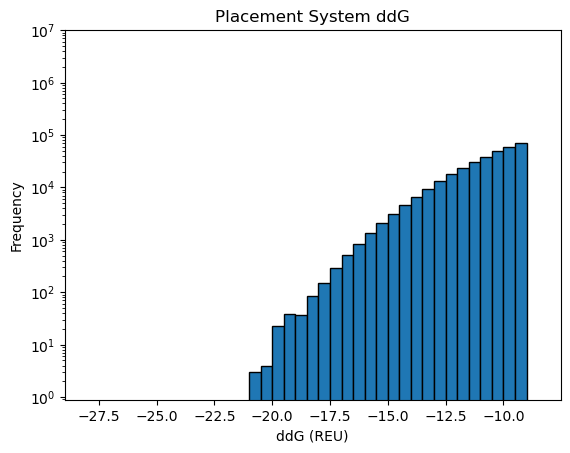

In [15]:
#ddg
x = df['ddg']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG')

# Set y-axis to display in scientific notation with individual tick values
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))
# Set y-axis to display numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
#set y scale to log
plt.yscale('log')

bin_edges = np.arange(-28, -8, 0.5)

plt.ylim(0,10000000)

#create 30 bin 1D hsitogram
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')
#set grid
#plt.grid(True)
#show plot
plt.show()

/scratch/local/ipykernel_84134/962510155.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000000)


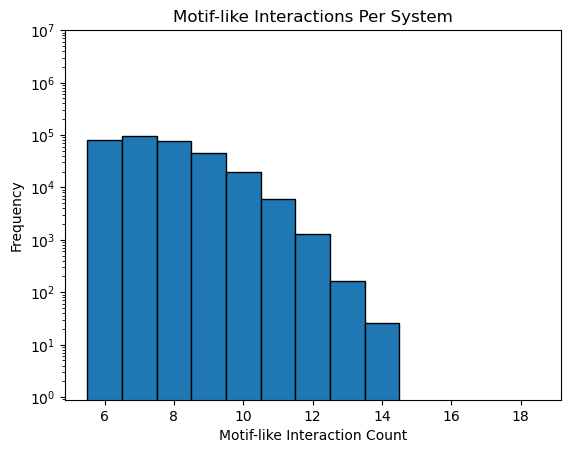

In [16]:
#motif-like interactions
x = df['total_motifs']
#set labels and title
plt.xlabel('Motif-like Interaction Count')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System')

# Set y-axis to display in scientific notation with individual tick values
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))
# Set y-axis to display numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
#set y scale to log
plt.yscale('log')

bin_edges = np.arange(5.5, 19, 1)

plt.ylim(0,10000000)

#create 30 bin 1D hsitogram
plt.hist(x, bins=bin_edges,  align = 'mid', edgecolor='black' ,width = 1)
#set grid
#plt.grid(True)
#show plot
plt.show()

/scratch/local/ipykernel_84134/3653875431.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000000)


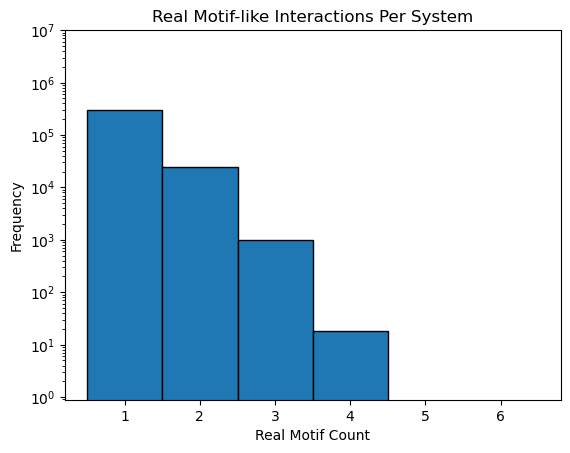

In [17]:
#real motif count
x = df['real_motif_ratio'] * df['total_motifs']
#set labels and title
plt.xlabel('Real Motif Count')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System')

# Set y-axis to display in scientific notation with individual tick values
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))
# Set y-axis to display numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
#set y scale to log
plt.yscale('log')

bin_edges = np.arange(0.5, 7, 1)

plt.ylim(0,10000000)

#create 30 bin 1D hsitogram
plt.hist(x, bins=bin_edges,  align = 'mid', edgecolor='black' ,width = 1)
#set grid
#plt.grid(True)
#show plot
plt.show()

/scratch/local/ipykernel_84134/876251995.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000000)


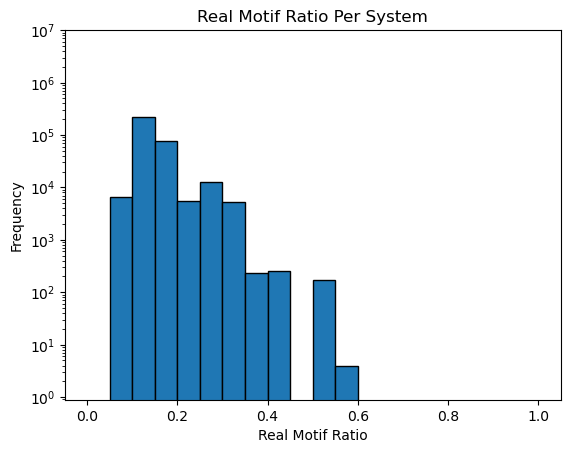

In [18]:
#real motif count
x = df['real_motif_ratio']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio Per System')

# Set y-axis to display in scientific notation with individual tick values
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))
# Set y-axis to display numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
#set y scale to log
plt.yscale('log')

bin_edges = np.arange(0, 1.05, 0.05)

plt.ylim(0,10000000)

#create 30 bin 1D hsitogram
plt.hist(x, bins=bin_edges,  align = 'mid', edgecolor='black')
#set grid
#plt.grid(True)
#show plot
plt.show()

In [19]:
#create the 12M_list_filtered_half_real_2_hbonds.csv
#it looks like the original doesn't actually have the requirement of 2 hbonds
#filter to select drugs that improve upon placement of drug 27 that we used previously on metrics of real motif ratio, motif cound, ddg, and hbond count
df_real_and_hbond = df[(df['real_motif_ratio'] >= 0.5) & (df['hbond_motif_count'] >= 0)]
len(df_real_and_hbond)

174

In [20]:
df_real_and_hbond

file        ddg  \
1918    /data/project/thymelab/agonist_gln_results_pul... -10.198747   
4206    /data/project/thymelab/agonist_gln_results_pul...  -9.376200   
13963   /data/project/thymelab/agonist_gln_results_pul... -12.404724   
14601   /data/project/thymelab/agonist_gln_results_pul... -11.296416   
21171   /data/project/thymelab/agonist_gln_results_pul... -12.569571   
...                                                   ...        ...   
325529  /data/project/thymelab/agonist_gln_results_pul...  -9.017987   
326080  /data/project/thymelab/agonist_gln_results_pul... -10.504364   
326829  /data/project/thymelab/agonist_gln_results_pul...  -9.930632   
326848  /data/project/thymelab/agonist_gln_results_pul... -11.573647   
327909  /data/project/thymelab/agonist_gln_results_pul...  -9.369574   

        total_motifs  significant_motifs  real_motif_ratio  hbond_motif_count  \
1918             6.0                 2.0               0.5                  1   
4206             6.0                 2.0               0.5                  0   
13963            6.0                 2.0               0.5                  0   
14601            6.0                 2.0               0.5                  0   
21171            6.0                 2.0               0.5                  0   
...              ...                 ...               ...                ...   
325529           6.0                 1.0               0.5                  0   
326080           6.0                 2.0               0.5                  0   
326829           6.0                 2.0               0.5                  0   
326848           6.0                 2.0               0.5                  2   
327909           6.0                 2.0               0.5                  1   

        hbond_motif_energy_sum  closest_autodock_recovery_rmsd  \
1918                 -0.777203                             100   
4206                  0.000000                             100   
13963                 0.000000                             100   
14601                 0.000000                             100   
21171                 0.000000                             100   
...                        ...                             ...   
325529                0.000000                             100   
326080                0.000000                             100   
326829                0.000000                             100   
326848               -1.369564                             100   
327909               -0.505019                             100   

        closest_autodock_recovery_ddg  strain_energy      total  \
1918                                0              0  98.524050   
4206                                0              0  99.123800   
13963                               0              0  96.095276   
14601                               0              0  97.203584   
21171                               0              0  95.930429   
...                               ...            ...        ...   
325529                              0              0  98.482013   
326080                              0              0  97.995636   
326829                              0              0  98.569368   
326848                              0              0  97.556789   
327909                              0              0  99.625407   

                 ligand  
1918    PV-006691655963  
4206    PV-006692535201  
13963   PV-006696093153  
14601   PV-006696334365  
21171   PV-006698863064  
...                 ...  
325529  PV-006689953372  
326080  PV-006690116308  
326829  PV-006690381127  
326848  PV-006690412474  
327909  PV-006690805801  

[174 rows x 12 columns]

In [21]:
#the difference between this and the original is that the original also contained the autodock and strain data.
#The autodock/strain data was not collected a second time, and was not passed down to the filtering steps of scoring, and so the csv file generated here has an extra ~600 placements that were previously filtered out
df_real_and_hbond.to_csv('/data/project/thymelab/agonist_gln_results_pulldown/high_glu_half_real.csv', index=False)

In [1]:
#note, we remove everything if we go for a good ddg and hbonds, so we will just go with the interactions that look mostly real and try to optimize those

In [35]:
#make new dataframe with ddg above certain thresholds
df_17 = df[df['ddg'] < -17]

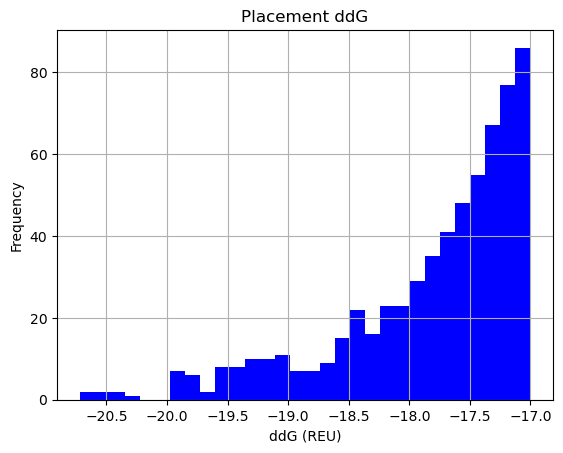

In [37]:
#ddg
x = df_17['ddg']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement ddG')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [38]:
#make new dataframe that selects for real motif ratio to be at least 0.25
df_17_real_quarter = df_17[df_17['real_motif_ratio'] >= 0.25]

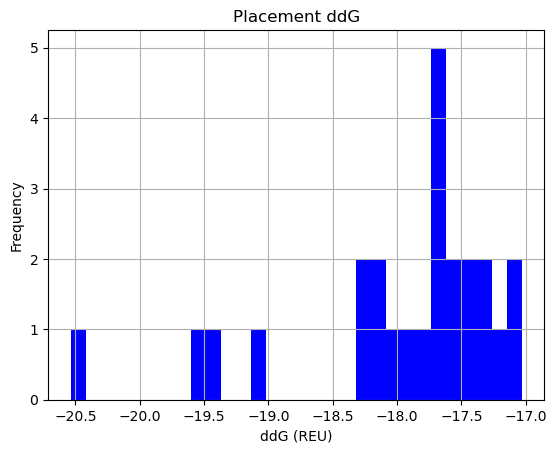

In [39]:
#ddg
x = df_17_real_quarter['ddg']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement ddG')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [40]:
len(df_17_real_quarter)

25

In [41]:
#make new dataframe that selects for having at least 1 rosetta hbond
df_17_real_quarter_rosetta_hbond = df_17_real_quarter[df_17_real_quarter['hbond_motif_count'] >= 2]

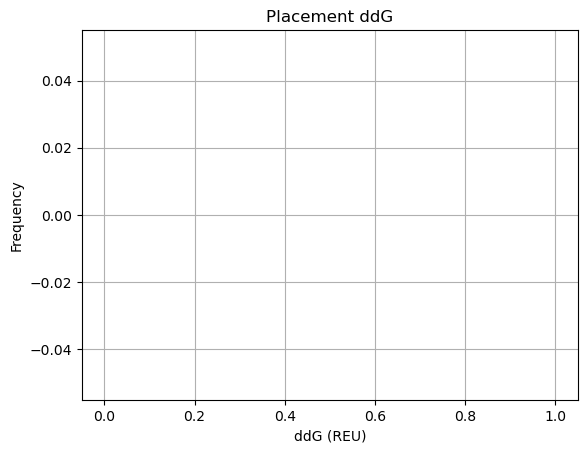

In [42]:
#ddg
x = df_17_real_quarter_rosetta_hbond['ddg']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement ddG')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [43]:
len(df_17_real_quarter_rosetta_hbond)

0

In [105]:
df_17_real_quarter_rosetta_hbond = df_17_real_quarter_rosetta_hbond.sort_values(by='ddg')

In [106]:
#note, this csv file was not used
df_17_real_quarter_rosetta_hbond.to_csv('/scratch/abgvg9/discovery_results/top_1000_placement/12M_-17_real_hbond.csv', index=False)

In [107]:
df_17_real_quarter_rosetta_hbond

file  \
5239947      6521/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/6521/placements/7l1u_receptor_only_PV-006649281448_5_1.pdb   
4803803     5961/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/5961/placements/7l1u_receptor_only_PV-006642575375_11_0.pdb   
1289517    11651/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/11651/placements/7l1u_receptor_only_PV-000407144265_2_0.pdb   
6240273      7806/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/7806/placements/7l1u_receptor_only_PV-001894047689_1_0.pdb   
3033618      3721/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/3721/placements/7l1u_receptor_only_PV-006615739888_9_1.pdb   
6130484      7661/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/7661/placements/7l1u_receptor_only_PV-006662908479_4_1.pdb   
4810171     5970/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/5970/placements/7l1u_receptor_only_PV-006642674779_12_0.pdb   
3312838      4079/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/4079/placements/7l1u_receptor_only_PV-006620012151_7_3.pdb   
7825695      9826/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/9826/placements/7l1u_receptor_only_PV-006688858672_1_0.pdb   
2950647     3613/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/3613/placements/7l1u_receptor_only_PV-006614444158_13_0.pdb   
220417     10279/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10279/placements/7l1u_receptor_only_PV-006694327860_2_0.pdb   
249660     10314/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10314/placements/7l1u_receptor_only_PV-006694747026_4_0.pdb   
6565611     8222/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/8222/placements/7l1u_receptor_only_PV-006669629110_13_6.pdb   
1019282    11302/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/11302/placements/7l1u_receptor_only_PV-006706777156_1_3.pdb   
2060387     2235/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/2235/placements/7l1u_receptor_only_PV-005239022292_12_0.pdb   
3223007      3966/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/3966/placements/7l1u_receptor_only_PV-006618639665_2_0.pdb   
3573386      4411/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/4411/placements/7l1u_receptor_only_PV-006623981273_1_0.pdb   
1074492   11375/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/11375/placements/7l1u_receptor_only_PV-006707650533_10_4.pdb   
2603120      3177/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/3177/placements/7l1u_receptor_only_PV-006609257537_7_1.pdb   
1061970    11358/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/11358/placements/7l1u_receptor_only_PV-006707453830_1_1.pdb   
1945767      1990/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/1990/placements/7l1u_receptor_only_PV-004507097792_8_1.pdb   
658740    10836/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10836/placements/7l1u_receptor_only_PV-006701191685_12_5.pdb   
4327543     5349/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/5349/placements/7l1u_receptor_only_PV-006635245217_13_1.pdb   
4218619      5207/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/5207/placements/7l1u_receptor_only_PV-006633535034_9_0.pdb   
4152482      5121/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/5121/placements/7l1u_receptor_only_PV-006632485044_1_2.pdb   
2060693     2235/

In [108]:
#make new dataframe with ddg above certain thresholds
df_16 = df[df['ddg'] < -16]

In [109]:
#make new dataframe that selects for real motif ratio to be at least 0.25
df_16_real_quarter = df_16[df_16['real_motif_ratio'] >= 0.25]

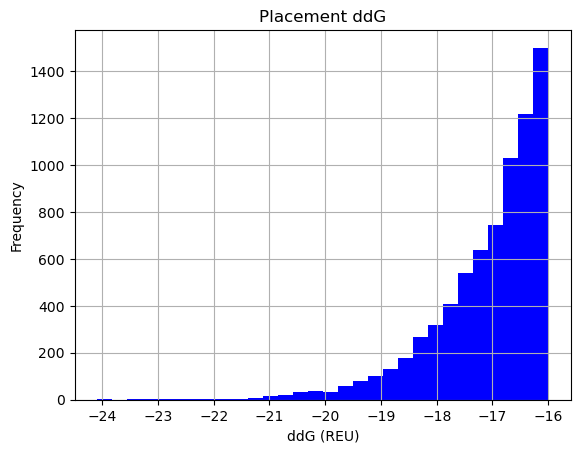

In [110]:
#ddg
x = df_16_real_quarter['ddg']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement ddG')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [111]:
len(df_16_real_quarter)

7382

In [112]:
df_16_real_quarter.to_csv('/scratch/abgvg9/discovery_results/top_1000_placement/12M_-16_ddg_quarter_real.csv', index=False)

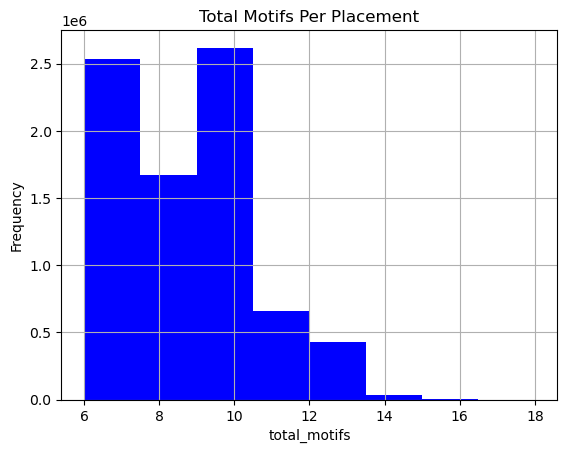

In [113]:
#total motifs
x = df['total_motifs']
#set labels and title
plt.xlabel('total_motifs')
plt.ylabel('Frequency')
plt.title('Total Motifs Per Placement')
#create 30 bin 1D hsitogram
plt.hist(x, bins=8, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

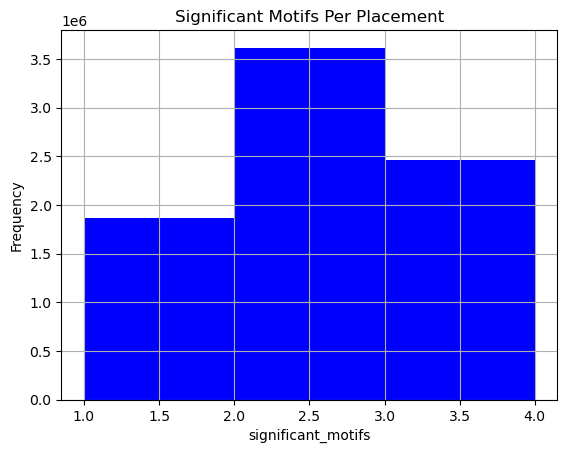

In [114]:
#significant motifs
x = df['significant_motifs']
#set labels and title
plt.xlabel('significant_motifs')
plt.ylabel('Frequency')
plt.title('Significant Motifs Per Placement')
#create 30 bin 1D hsitogram
plt.hist(x, bins=3, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

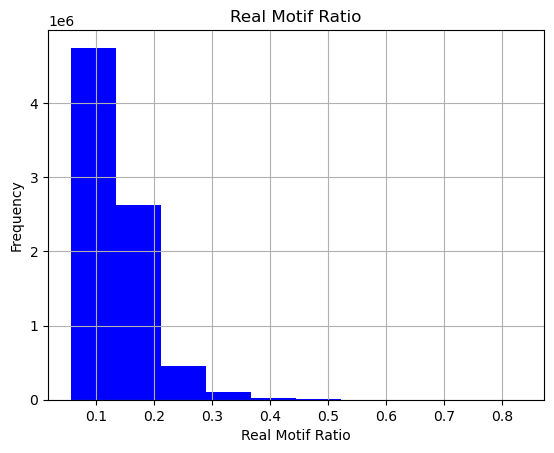

In [115]:
#real motifs ratio
x = df['real_motif_ratio']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio')
#create 30 bin 1D hsitogram
plt.hist(x, bins=10, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [116]:
df_real_half = df[df['real_motif_ratio'] >= 0.5]

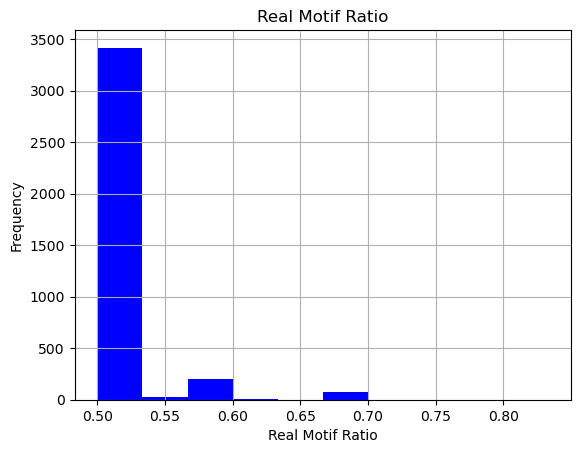

In [117]:
#real motifs ratio
x = df_real_half['real_motif_ratio']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio')
#create 30 bin 1D hsitogram
plt.hist(x, bins=10, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [118]:
len(df_real_half)

3726

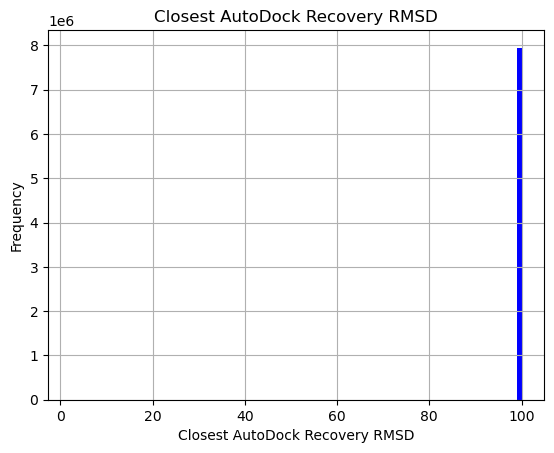

In [119]:
#closest_autodock_recovery_rmsd
#note, if autodock failed to get any placements for the ligand, the default is to set the value to 100
x = df['closest_autodock_recovery_rmsd']
#set labels and title
plt.xlabel('Closest AutoDock Recovery RMSD')
plt.ylabel('Frequency')
plt.title('Closest AutoDock Recovery RMSD')
#create 30 bin 1D hsitogram
plt.hist(x, bins=100, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

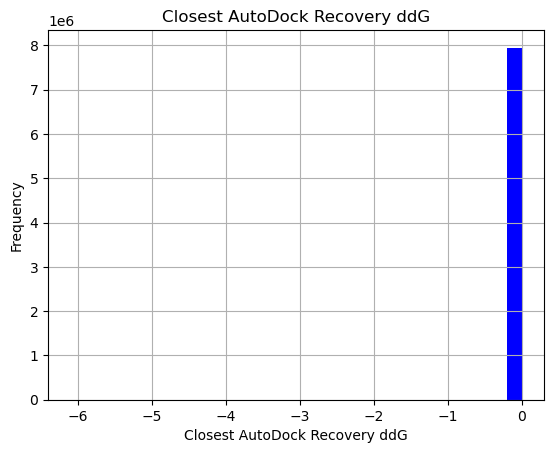

In [120]:
#closest_autodock_recovery_ddg
#note, if autodock failed to get any placements for the ligand, the default is to set the value to 0
x = df['closest_autodock_recovery_ddg']
#set labels and title
plt.xlabel('Closest AutoDock Recovery ddG')
plt.ylabel('Frequency')
plt.title('Closest AutoDock Recovery ddG')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

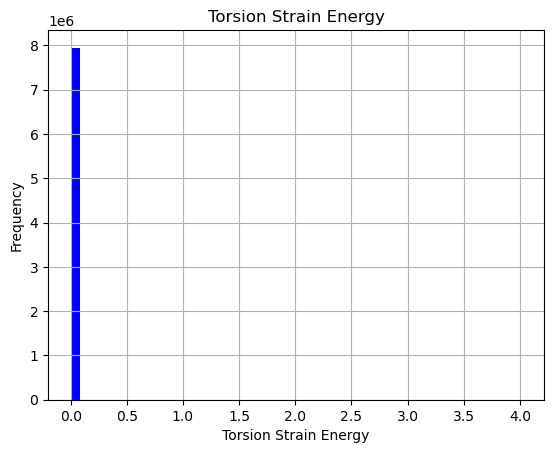

In [121]:
#torsion strain energy
#note, if STRAIN failed to get an energy for the ligand, the default is to set the value to 100
x = df['strain_energy']
#set labels and title
plt.xlabel('Torsion Strain Energy')
plt.ylabel('Frequency')
plt.title('Torsion Strain Energy')
#create 30 bin 1D hsitogram
plt.hist(x, bins=50, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

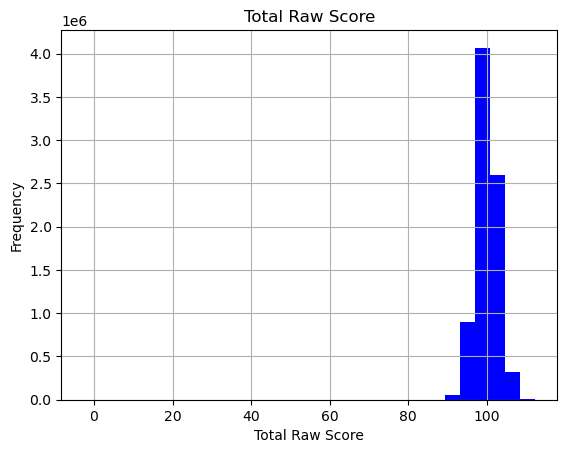

In [122]:
#total score
#raw total score can be very skewed, and likely not a good metric at all
x = df['total']
#set labels and title
plt.xlabel('Total Raw Score')
plt.ylabel('Frequency')
plt.title('Total Raw Score')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

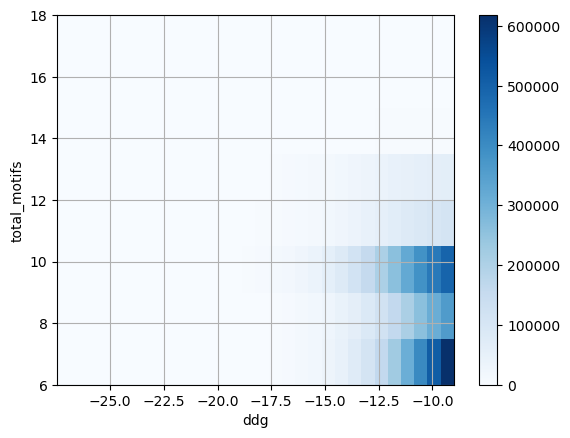

In [123]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = df['ddg']
y = df['total_motifs']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 8))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('ddg')
plt.ylabel('total_motifs')

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')

plt.colorbar()

plt.grid(True)
plt.show()

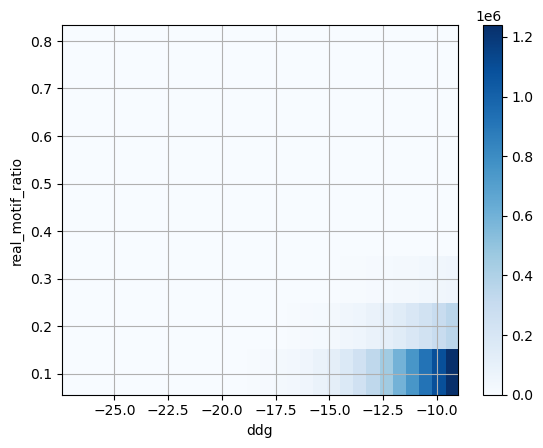

In [124]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = df['ddg']
y = df['real_motif_ratio']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 8))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('ddg')
plt.ylabel('real_motif_ratio')

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')

plt.colorbar()

plt.grid(True)
plt.show()

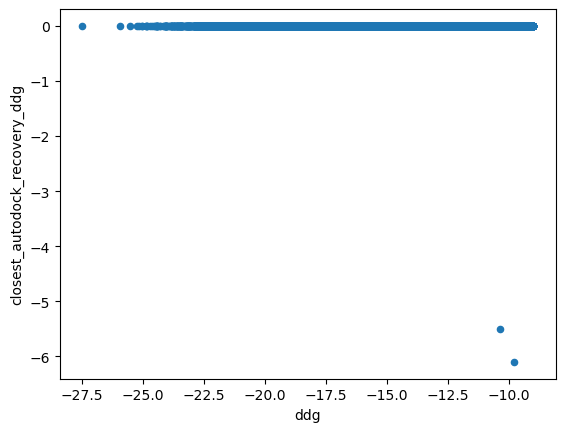

In [125]:
df.plot(kind='scatter',x='ddg',y='closest_autodock_recovery_ddg')
plt.show()

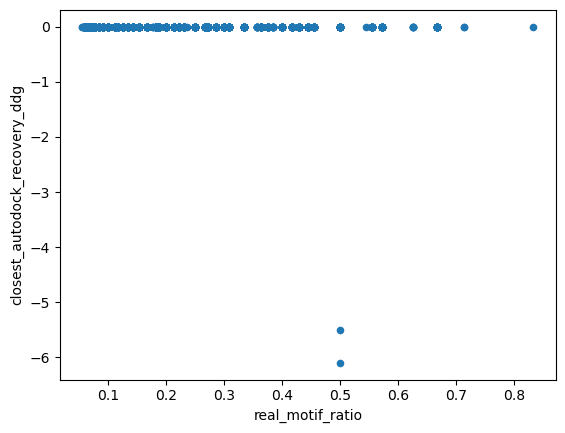

In [126]:
df.plot(kind='scatter',x='real_motif_ratio',y='closest_autodock_recovery_ddg')
plt.show()

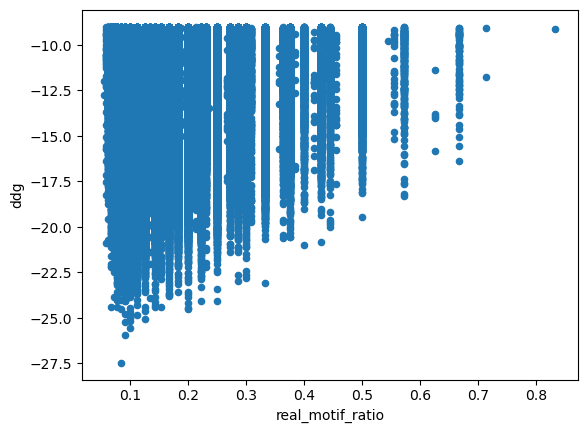

In [127]:
df.plot(kind='scatter',x='real_motif_ratio',y='ddg')
plt.show()

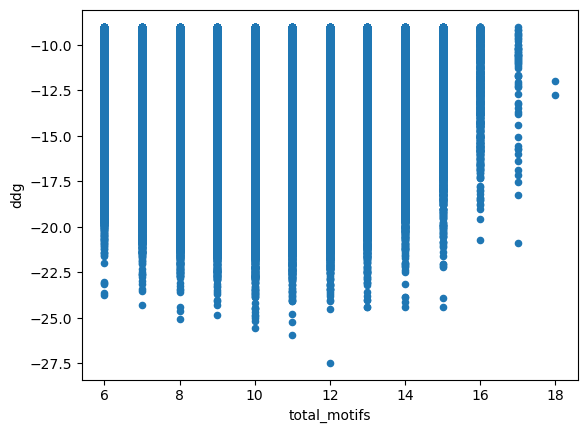

In [128]:
df.plot(kind='scatter',x='total_motifs',y='ddg')
plt.show()

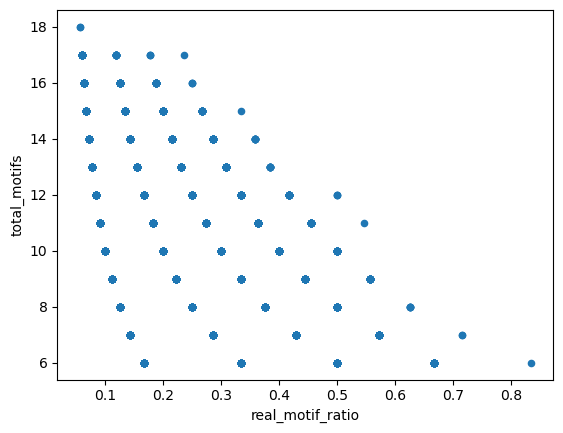

In [129]:
df.plot(kind='scatter',x='real_motif_ratio',y='total_motifs')
plt.show()

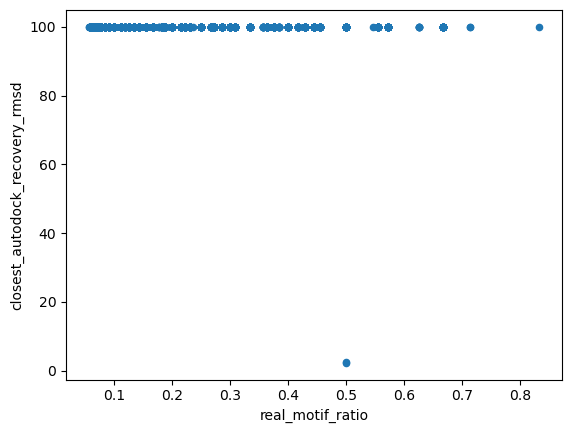

In [130]:
df.plot(kind='scatter',x='real_motif_ratio',y='closest_autodock_recovery_rmsd')
plt.show()

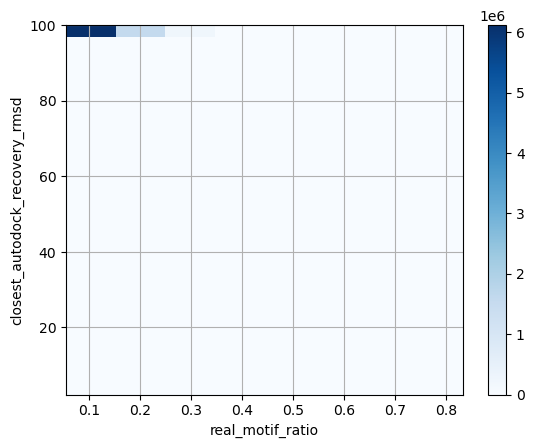

In [131]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = df['real_motif_ratio']
y = df['closest_autodock_recovery_rmsd']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(8, 30))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('real_motif_ratio')
plt.ylabel('closest_autodock_recovery_rmsd')

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')

plt.colorbar()

plt.grid(True)
plt.show()

In [132]:
#df_sorted = df.sort_values(by='real_motif_ratio', ascending=False)
#df_sorted = df.sort_values(by='closest_autodock_recovery_ddg', ascending=False)

#print(df_sorted.head(100)[['file','real_motif_ratio','total','closest_autodock_recovery_ddg']])
#print(df_sorted)

KeyboardInterrupt: 

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [142]:
len(df)

7946849

In [143]:
len(df_16_real_quarter)

7382

In [144]:
len(df_real_and_hbond)

3726

In [145]:
df_real_and_hbond

file  \
0               0_backup/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/0/placements/7l1u_receptor_only_Z1638711304_5_4.pdb   
1               0_backup/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/0/placements/7l1u_receptor_only_Z2228465286_7_1.pdb   
551                    0/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/0/placements/7l1u_receptor_only_Z1638711304_5_4.pdb   
569                    0/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/0/placements/7l1u_receptor_only_Z2228465286_7_1.pdb   
3731       10003/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10003/placements/7l1u_receptor_only_PV-006690999473_7_5.pdb   
7265      10008/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10008/placements/7l1u_receptor_only_PV-006691037966_12_1.pdb   
8269         1000/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/1000/placements/7l1u_receptor_only_PV-005473709931_3_3.pdb   
8403         1000/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/1000/placements/7l1u_receptor_only_PV-005473942340_9_0.pdb   
8474         1000/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/1000/placements/7l1u_receptor_only_PV-005474677313_7_0.pdb   
8620       10010/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10010/placements/7l1u_receptor_only_PV-006691074346_9_1.pdb   
12033      10014/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10014/placements/7l1u_receptor_only_PV-006691123182_8_0.pdb   
14078     10017/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10017/placements/7l1u_receptor_only_PV-006691154832_14_3.pdb   
18783      10022/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10022/placements/7l1u_receptor_only_PV-006691215638_4_1.pdb   
18828     10022/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10022/placements/7l1u_receptor_only_PV-006691212066_13_1.pdb   
27856     10034/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10034/placements/7l1u_receptor_only_PV-006691368559_10_1.pdb   
28239      10034/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10034/placements/7l1u_receptor_only_PV-006691367657_1_1.pdb   
31866        1003/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/1003/placements/7l1u_receptor_only_PV-005484154093_2_0.pdb   
32098       1003/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/1003/placements/7l1u_receptor_only_PV-005485203582_10_0.pdb   
35031      10044/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10044/placements/7l1u_receptor_only_PV-006691485183_9_1.pdb   
35496      10044/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10044/placements/7l1u_receptor_only_PV-006691488673_3_4.pdb   
38205      10048/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10048/placements/7l1u_receptor_only_PV-000517683935_9_5.pdb   
38922     10048/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10048/placements/7l1u_receptor_only_PV-001625470497_9_11.pdb   
40271      10050/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10050/placements/7l1u_receptor_only_PV-006691550377_6_2.pdb   
40829      10051/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10051/placements/7l1u_receptor_only_PV-006691565646_7_4.pdb   
42876      10053/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10053/placements/7l1u_receptor_only_PV-006691593330_2_0.pdb   
46332     10058/p

In [ ]:
#real ratio >0.5 group metrics (df_real_and_hbond)

/scratch/local/ipykernel_121708/3859562400.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)


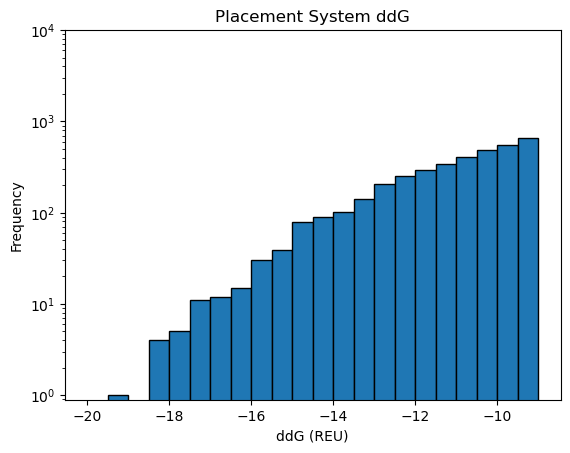

In [170]:
#ddg
x = df_real_and_hbond['ddg']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG')

# Set y-axis to display in scientific notation with individual tick values
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))
# Set y-axis to display numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
#set y scale to log
plt.yscale('log')

bin_edges = np.arange(-20, -8.5, 0.5)

plt.ylim(0,10000)

#create 30 bin 1D hsitogram
plt.hist(x, bins=bin_edges,  align = 'mid', edgecolor='black')
#set grid
#plt.grid(True)
#show plot
plt.show()

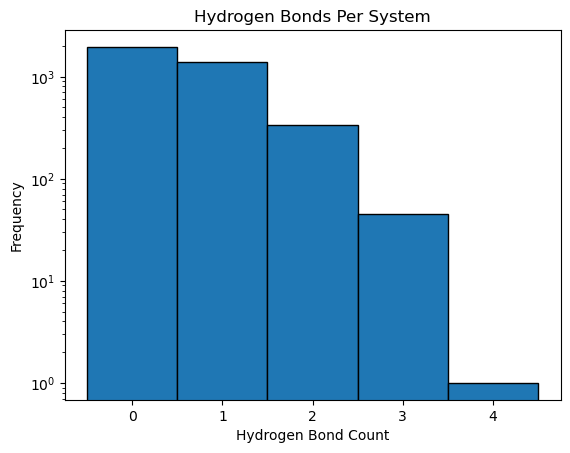

In [171]:
#hbond
x = df_real_and_hbond['hbond_motif_count']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System')

bin_edges = np.arange(-0.5, 5, 1)

# Plot histogram
#plt.hist(x, bins=bin_edges, edgecolor='black')

#create 30 bin 1D hsitogram
plt.hist(x, bins=bin_edges,  align='mid', width = 1, edgecolor='black')
#set grid
#plt.grid(True)

# Set y-axis to display in scientific notation with individual tick values
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))
# Set y-axis to display numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
#set y scale to log
plt.yscale('log')

#show plot
plt.show()

/scratch/local/ipykernel_121708/2616668335.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)


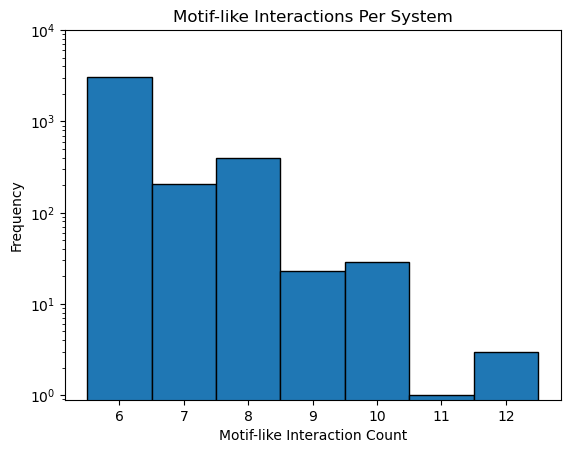

In [172]:
#motif-like interactions
x = df_real_and_hbond['total_motifs']
#set labels and title
plt.xlabel('Motif-like Interaction Count')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System')

# Set y-axis to display in scientific notation with individual tick values
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))
# Set y-axis to display numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
#set y scale to log
plt.yscale('log')

bin_edges = np.arange(5.5, 13, 1)

plt.ylim(0,10000)

#create 30 bin 1D hsitogram
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black' ,width = 1)
#set grid
#plt.grid(True)
#show plot
plt.show()

/scratch/local/ipykernel_121708/354782040.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)


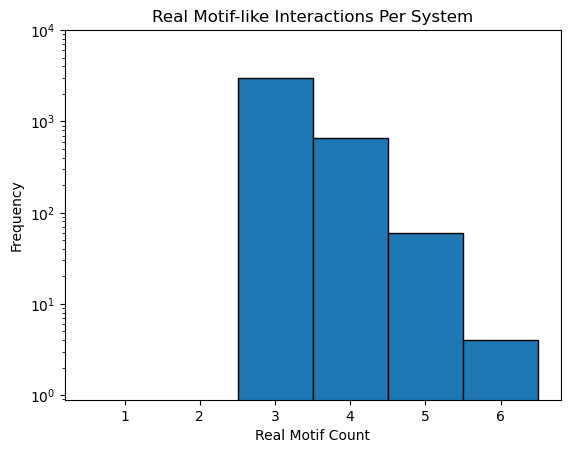

In [169]:
#real motif count
x = df_real_and_hbond['real_motif_ratio'] * df_real_and_hbond['total_motifs']
#set labels and title
plt.xlabel('Real Motif Count')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System')

# Set y-axis to display in scientific notation with individual tick values
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))
# Set y-axis to display numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
#set y scale to log
plt.yscale('log')

bin_edges = np.arange(0.5, 7, 1)

plt.ylim(0,10000)

#create 30 bin 1D hsitogram
plt.hist(x, bins=bin_edges,  align = 'mid', edgecolor='black' ,width = 1)
#set grid
#plt.grid(True)
#show plot
plt.show()

/scratch/local/ipykernel_121708/950367724.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)


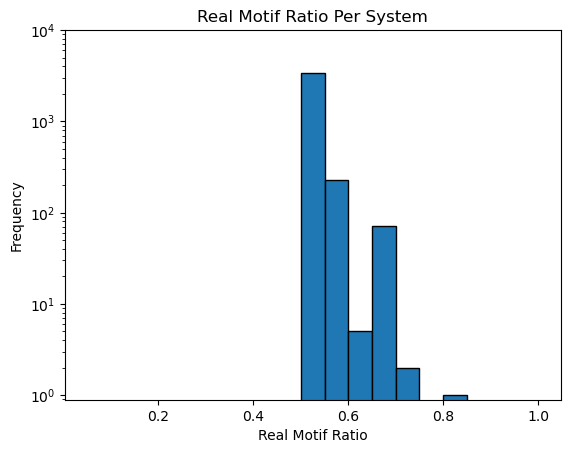

In [174]:
#real motif count
x = df_real_and_hbond['real_motif_ratio']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio Per System')

# Set y-axis to display in scientific notation with individual tick values
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))
# Set y-axis to display numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
#set y scale to log
plt.yscale('log')

bin_edges = np.arange(0.05, 1.05, 0.05)

plt.ylim(0,10000)

#create 30 bin 1D hsitogram
plt.hist(x, bins=bin_edges,  align = 'mid', edgecolor='black')
#set grid
#plt.grid(True)
#show plot
plt.show()

/scratch/local/ipykernel_121708/180354862.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)


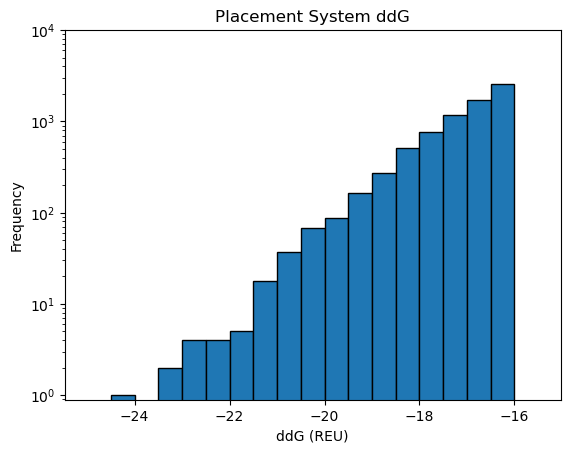

In [175]:
#ddg
x = df_16_real_quarter['ddg']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG')

# Set y-axis to display in scientific notation with individual tick values
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))
# Set y-axis to display numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
#set y scale to log
plt.yscale('log')

bin_edges = np.arange(-25, -15, 0.5)

plt.ylim(0,10000)

#create 30 bin 1D hsitogram
plt.hist(x, bins=bin_edges,  align = 'mid', edgecolor='black')
#set grid
#plt.grid(True)
#show plot
plt.show()

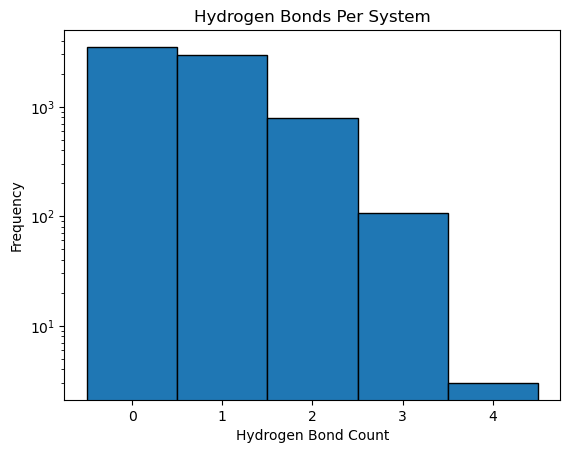

In [176]:
#hbond
x = df_16_real_quarter['hbond_motif_count']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System')

bin_edges = np.arange(-0.5, 5, 1)

# Plot histogram
#plt.hist(x, bins=bin_edges, edgecolor='black')

#create 30 bin 1D hsitogram
plt.hist(x, bins=bin_edges,  align='mid', width = 1, edgecolor='black')
#set grid
#plt.grid(True)

# Set y-axis to display in scientific notation with individual tick values
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))
# Set y-axis to display numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
#set y scale to log
plt.yscale('log')

#show plot
plt.show()

/scratch/local/ipykernel_121708/1215447378.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)


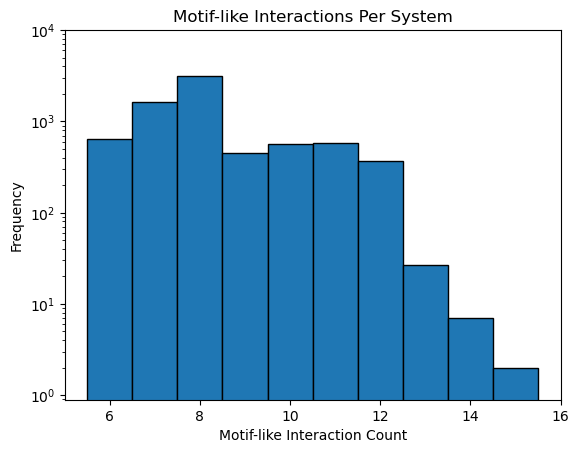

In [177]:
#motif-like interactions
x = df_16_real_quarter['total_motifs']
#set labels and title
plt.xlabel('Motif-like Interaction Count')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System')

# Set y-axis to display in scientific notation with individual tick values
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))
# Set y-axis to display numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
#set y scale to log
plt.yscale('log')

bin_edges = np.arange(5.5, 16, 1)

plt.ylim(0,10000)

#create 30 bin 1D hsitogram
plt.hist(x, bins=bin_edges,  align = 'mid', edgecolor='black' ,width = 1)
#set grid
#plt.grid(True)
#show plot
plt.show()

/scratch/local/ipykernel_121708/2445993169.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)


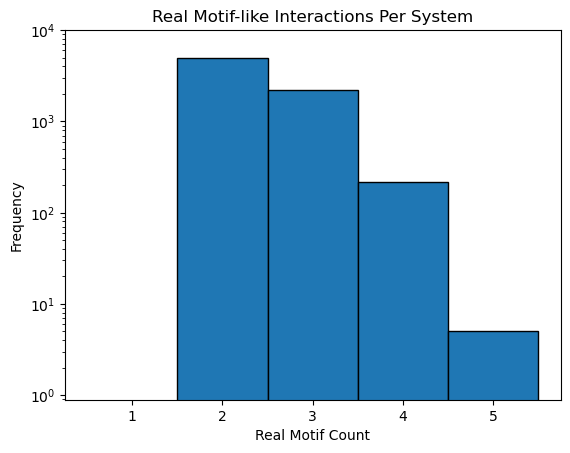

In [178]:
#real motif count
x = df_16_real_quarter['real_motif_ratio'] * df_16_real_quarter['total_motifs']
#set labels and title
plt.xlabel('Real Motif Count')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System')

# Set y-axis to display in scientific notation with individual tick values
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))
# Set y-axis to display numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
#set y scale to log
plt.yscale('log')

bin_edges = np.arange(0.5, 6, 1)

plt.ylim(0,10000)

#create 30 bin 1D hsitogram
plt.hist(x, bins=bin_edges,  align = 'mid', edgecolor='black' ,width = 1)
#set grid
#plt.grid(True)
#show plot
plt.show()

/scratch/local/ipykernel_121708/875927088.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)


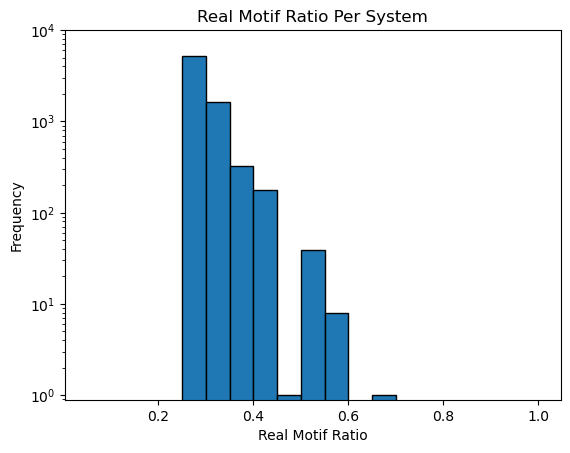

In [179]:
#real motif count
x = df_16_real_quarter['real_motif_ratio']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio Per System')

# Set y-axis to display in scientific notation with individual tick values
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))
# Set y-axis to display numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
#set y scale to log
plt.yscale('log')

bin_edges = np.arange(0.05, 1.05, 0.05)

plt.ylim(0,10000)

#create 30 bin 1D hsitogram
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')
#set grid
#plt.grid(True)
#show plot
plt.show()